In [1]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
import os
import sys
import pickle
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import targprop.datasets as ds
import targprop.operations as ops
import targprop.tprop_train as tprop
import targprop.tprop_train_stable as tprop_stable

import tensorflow as tf

In [4]:
## Params
cur_params = {}
cur_params['batch_size']         = 100
cur_params['t_steps']            = 50000 # 10k for now. maybe final sims will be 20k+

cur_params['gamma']              = 1e-3
cur_params['alpha_t']            = 0.5
cur_params['noise_str']          = 1e-2

cur_params['learning_rate']      = 1e-2
cur_params['learning_rate_inv']  = 1e-3
cur_params['learning_rate_rinv'] = 1e-3
cur_params['num_steps_rinv']     = 2

cur_params['SGD']                = False

cur_params['mode'] = 'classification'
#cur_params['dataset'] = 'mnist'

cur_params['activation'] = 'tanh'
cur_params['top_loss'] = 'softmax_ce'
cur_params['l_dim'] = 2*[240]

cur_params['preprocess'] = False

In [5]:
# datasets
n = 1000

In [6]:
Xcircs = ds.combine_data((ds.annulus(n/4, d=2, r1=0.1, r2=0.2),
                       ds.annulus(n/4, d=2, r1=0.3, r2=0.4),
                       ds.annulus(n/4, d=2, r1=0.5, r2=0.6),
                       ds.annulus(n/4, d=2, r1=0.7, r2=0.8)))
Xcircs.outputs = np.zeros_like(Xcircs.inputs)
Xcircs.outputs[:n/4,0] = 1
Xcircs.outputs[n/4:2*n/4,1] = 1
Xcircs.outputs[2*n/4:3*n/4,0] = 1
Xcircs.outputs[3*n/4:4*n/4,1] = 1

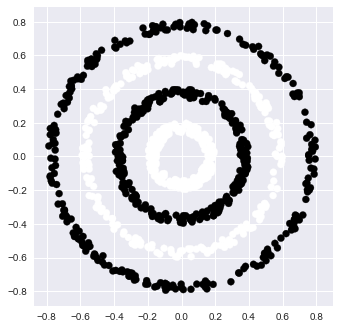

In [7]:
X = Xcircs
plt.scatter(X.inputs[:,0], X.inputs[:,1], c=ds.un_hotify(X.outputs))
plt.axis('square')
plt.show()

In [8]:
err_alg = 2

In [ ]:
tb_path = './stability/'
path, dirs, files = os.walk(tb_path).next()
cur_run = len(dirs)+1

out_dict = tprop_stable.train_net(dataset='mnist', err_alg=err_alg, tb_path='./stability/'+str(cur_run), **cur_params)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iter:  0 Loss, accuracy:  [0.1005116, 0.1]
Iter:  20 Loss, accuracy:  [0.091789104, 0.1]
Iter:  40 Loss, accuracy:  [0.08503224, 0.1]
Iter:  60 Loss, accuracy:  [0.08004792, 0.1]
Iter:  80 Loss, accuracy:  [0.076696225, 0.1]
Iter:  100 Loss, accuracy:  [0.074781068, 0.090000004]
Iter:  120 Loss, accuracy:  [0.073993728, 0.090000004]
Iter:  140 Loss, accuracy:  [0.073915474, 0.079999998]
Iter:  160 Loss, accuracy:  [0.074072115, 0.079999998]
Iter:  180 Loss, accuracy:  [0.074019477, 0.090000004]
Iter:  200 Loss, accuracy:  [0.073430985, 0.1]
Iter:  220 Loss, accuracy:  [0.072160527, 0.1]
Iter:  240 Loss, a

In [ ]:
tb_path = './stability/'
path, dirs, files = os.walk(tb_path).next()
cur_run = len(dirs)+1

out_dict = tprop.train_net(err_alg=err_alg, tb_path='./stability/'+str(cur_run), **cur_params)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[784, 240, 240, 10]
3
Iter:  0 Loss, accuracy:  [2.4751937, 0.07]
Iter:  100 Loss, accuracy:  [2.4583964, 0.079999998]
Iter:  200 Loss, accuracy:  [1.1673048, 0.81999999]
Iter:  300 Loss, accuracy:  [0.16610713, 1.0]
Iter:  400 Loss, accuracy:  [0.058347683, 1.0]
Iter:  500 Loss, accuracy:  [0.050273329, 1.0]
Iter:  600 Loss, accuracy:  [0.033072833, 1.0]
Iter:  700 Loss, accuracy:  [0.030275177, 1.0]
Iter:  800 Loss, accuracy:  [0.027711, 1.0]
Iter:  900 Loss, accuracy:  [0.064537637, 0.99000001]
Iter:  1000 Loss, accuracy:  [0.033124611, 1.0]
Iter:  1100 Loss, accuracy:  [0.026351171, 1.0]
Iter:  1200 L